In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/ashutoshanand/Downloads/Price_dataset.csv', index_col='Date', parse_dates=True)

df.index.freq= 'MS'

In [3]:
df.head()

,Gram,Moong,Arhar
Date,,,
2014-01-01,101.8,113.6,106.7
2014-02-01,101.1,116.9,106.5
2014-03-01,100.5,120.0,106.0
2014-04-01,100.6,124.1,106.6
2014-05-01,100.4,126.6,106.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2014-01-01 to 2024-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gram    129 non-null    float64
 1   Moong   129 non-null    float64
 2   Arhar   129 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


# Descriptive statistics

<Axes: xlabel='Date'>

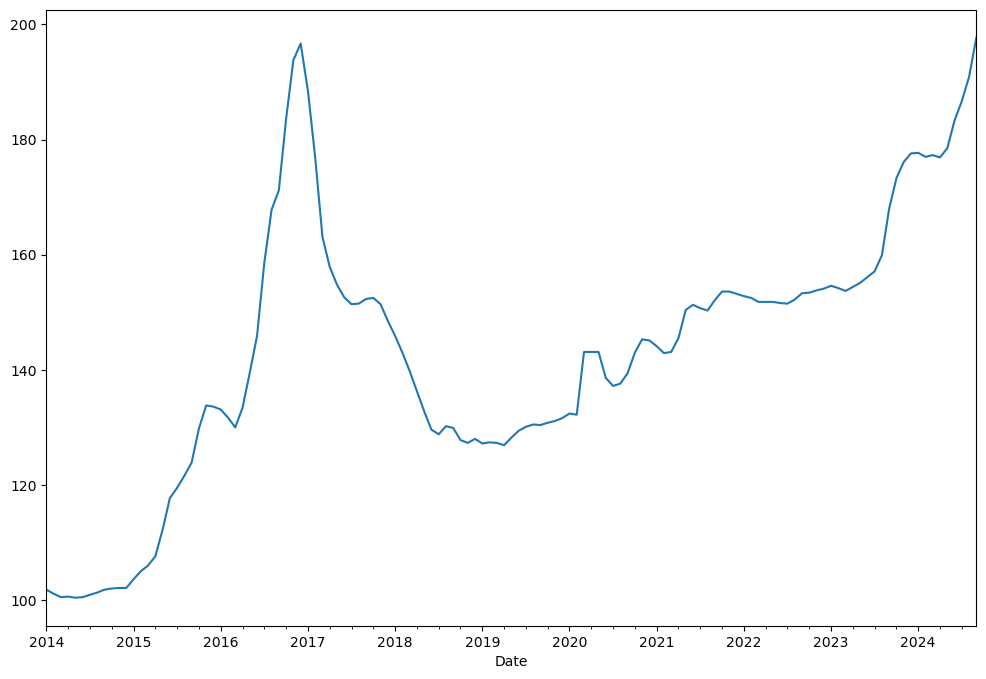

In [5]:
df['Gram'].plot(figsize=(12,8))

In [6]:
df['Gram'].describe()

count    129.000000
mean     143.054264
std       23.302813
min      100.400000
25%      129.800000
50%      144.100000
75%      153.800000
max      197.700000
Name: Gram, dtype: float64

In [7]:
df['Gram'].skew()

0.05662678183949648

In [7]:
df['Gram'].kurtosis()

-0.19066020714147136

## Decompose the series

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
decompose = seasonal_decompose(df['Gram'], model='add')

In [10]:
decompose.seasonal

Date
2014-01-01    1.796910
2014-02-01   -0.643924
2014-03-01   -2.176840
2014-04-01   -2.896053
2014-05-01   -2.346516
                ...   
2024-05-01   -2.346516
2024-06-01   -2.494201
2024-07-01   -1.690174
2024-08-01   -0.612674
2024-09-01    0.691076
Freq: MS, Name: seasonal, Length: 129, dtype: float64

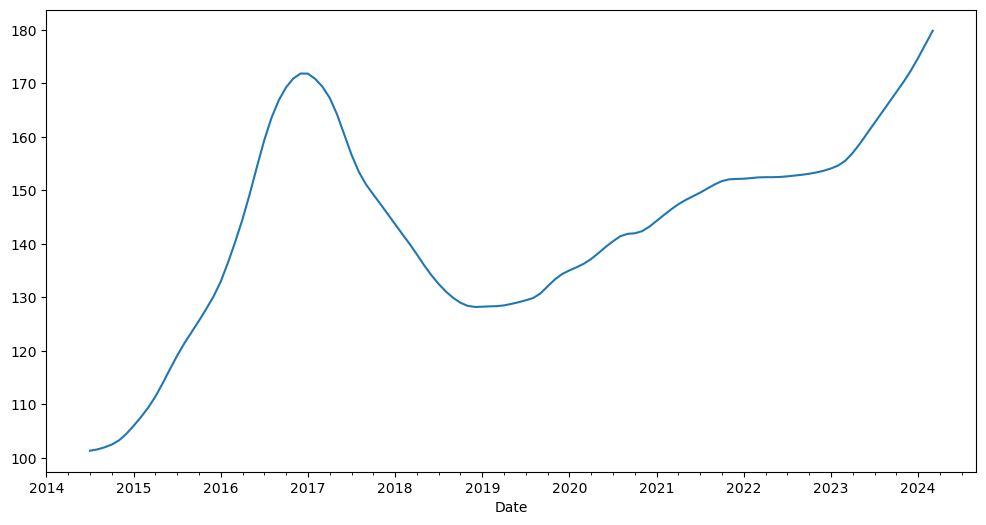

In [11]:
decompose.trend.plot(figsize=(12,6));

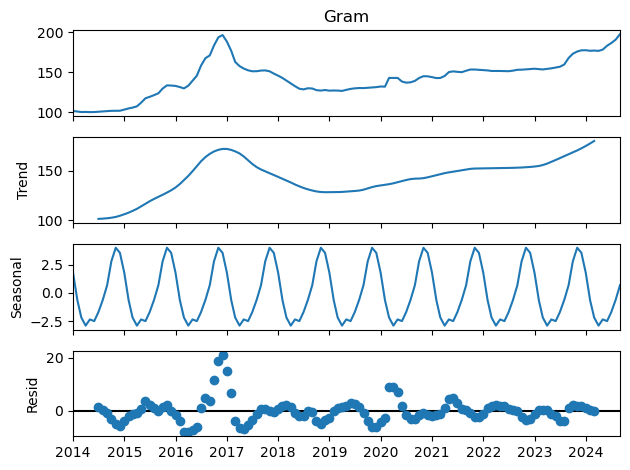

In [12]:
# Plot the decomposition
decompose.plot()
plt.show()

<Axes: >

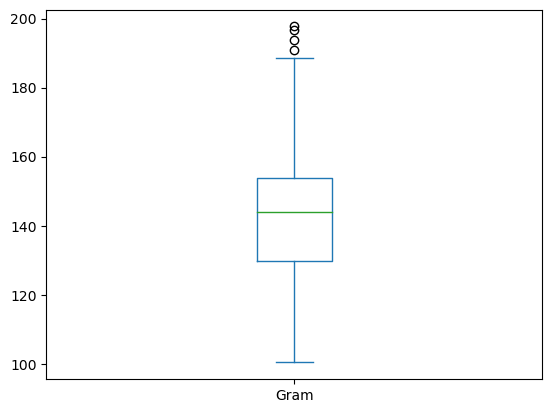

In [13]:
df['Gram'].plot.box()

# Time series modeling

# Stationarity test

A stationary process has the property that the mean, variance and autocorrelation structure do not change over time.

> $H_0$ : Series is unitroot or non stationary,
>> $H_1$ : Series is stationary

<Axes: xlabel='Date'>

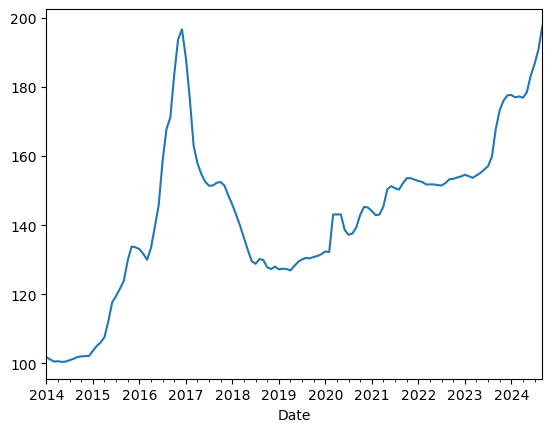

In [14]:
df['Gram'].plot()

In [16]:
from arch.unitroot import ADF, KPSS, PhillipsPerron

In [17]:
PhillipsPerron(df['Gram'])

Test Statistic,-1.062
P-value,0.730
Lags,13


In [18]:
ADF(df['Gram'])

Test Statistic,-1.535
P-value,0.516
Lags,1


#### 1st diff

In [19]:
df_diff = df['Gram'].diff(periods=1).iloc[1:]

In [20]:
df_diff.head()

Date
2014-02-01   -0.7
2014-03-01   -0.6
2014-04-01    0.1
2014-05-01   -0.2
2014-06-01    0.1
Freq: MS, Name: Gram, dtype: float64

In [21]:
PhillipsPerron(df_diff)

Test Statistic,-4.033
P-value,0.001
Lags,13


In [22]:
df_diff.head()

Date
2014-02-01   -0.7
2014-03-01   -0.6
2014-04-01    0.1
2014-05-01   -0.2
2014-06-01    0.1
Freq: MS, Name: Gram, dtype: float64

In [23]:
ADF(df_diff)

Test Statistic,-4.894
P-value,0.000
Lags,1


##### In diff. 1, the data series are in stationary.

<Axes: xlabel='Date'>

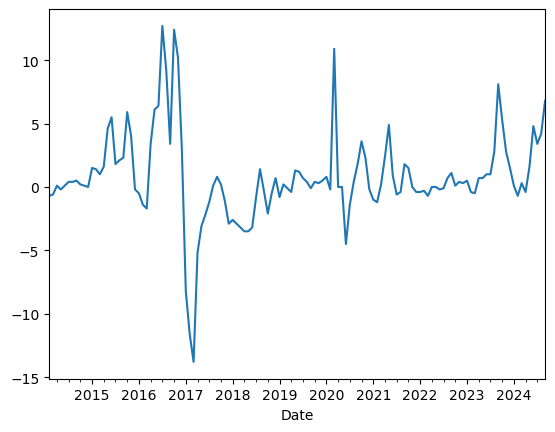

In [24]:
df_diff.plot()

## ACF and PACF plot

>**Autocorrelation** represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

> **Partial Autocorrelation** is a conditional correlation.

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

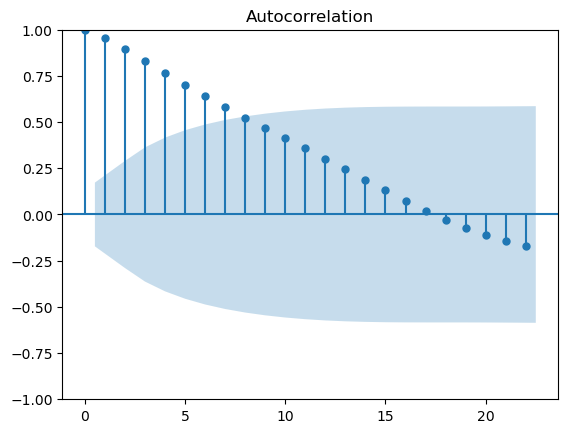

In [26]:
plot_acf(df['Gram']); # q order

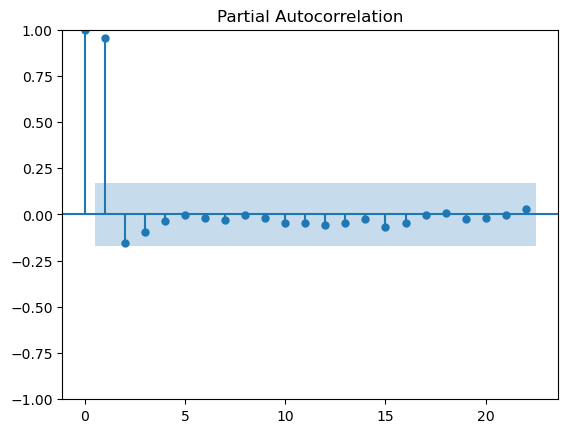

In [27]:
plot_pacf(df['Gram']); # p order

# AUTO ARIMA

In [28]:
from pmdarima import auto_arima

In [29]:
stepwise_fit = auto_arima(df['Gram'], start_p=0,start_q=0, max_p=6,max_q=3, m=12, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=687.192, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=691.515, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=609.559, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=631.154, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=695.096, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=611.107, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=611.444, Time=0.19 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=611.512, Time=0.20 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=609.585, Time=0.09 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=612.970, Time=0.44 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=687.113, Time=0.16 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=609.351, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=610.391, Time=0.03 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=611.150, Time=0.22 sec
 ARIMA(2,1,0)(1,0,1)[12] intercep

In [30]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  129
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -301.278
Date:                            Mon, 11 Nov 2024   AIC                            608.555
Time:                                    02:09:27   BIC                            617.111
Sample:                                01-01-2014   HQIC                           612.032
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6949      0.042     16.479      0.000       0.612       0.778
ar.S.L12       0.1679      0.098      1.722      0.085      -0.023       0.359
sigma2         6.4348      0.411     15.666      0.000       5.630       7.240
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):               196.38
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2014-01-01 to 2024-09-01
Freq: MS
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gram    129 non-null    float64
 1   Moong   129 non-null    float64
 2   Arhar   129 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


In [35]:
train = df.iloc[:115]
test = df.iloc[115:]

In [36]:
len(test)

14

In [37]:
train.tail()

,Gram,Moong,Arhar
Date,,,
2023-03-01,153.7,164.0,175.0
2023-04-01,154.4,167.5,179.8
2023-05-01,155.1,169.5,184.4
2023-06-01,156.1,171.7,200.3
2023-07-01,157.1,173.2,211.4


In [38]:
test.head()

,Gram,Moong,Arhar
Date,,,
2023-08-01,159.9,174.2,217.2
2023-09-01,168.0,177.7,231.6
2023-10-01,173.3,180.4,240.3
2023-11-01,176.1,182.0,245.6
2023-12-01,177.6,182.4,246.4


## ARIMA Model for Gram


ARIMA(p,d,q)

In [44]:
model_gram = ARIMA(train['Gram'], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))

result_gram = model_gram.fit()
result_gram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             Gram   No. Observations:                  115
Model:             ARIMA(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -269.741
Date:                          Mon, 11 Nov 2024   AIC                            545.482
Time:                                  02:10:58   BIC                            553.690
Sample:                              01-01-2014   HQIC                           548.813
                                   - 07-01-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6771      0.043     15.581      0.000       0.592       0.762
ar.S.L12       0.1372      0.109      1.256      0.209      -0.077       0.351
sigma2         6.5997      0.440     14.982      0.000       5.736       7.463
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):               196.85
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
prediction_gram = result_gram.predict(start=len(train),end=len(train)+len(test)-1, typ='levels').rename('ARIMA(1,1,0)-predictions')

In [46]:
prediction_gram

2023-08-01    157.882439
2023-09-01    158.498131
2023-10-01    158.826510
2023-11-01    159.094452
2023-12-01    159.279873
2024-01-01    159.446161
2024-02-01    159.457392
2024-03-01    159.433544
2024-04-01    159.559929
2024-05-01    159.676525
2024-06-01    159.827666
2024-07-01    159.974319
2024-08-01    160.088074
2024-09-01    160.176888
Freq: MS, Name: ARIMA(1,1,0)-predictions, dtype: float64

In [47]:
test['ARIMA_prediction']= prediction_gram

<Axes: title={'center': 'True prediction_ARIMA'}, xlabel='Date'>

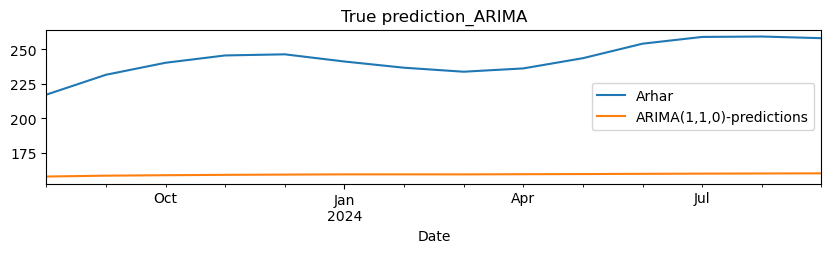

In [48]:
test['Arhar'].plot(figsize=(10,2), legend=True, title='True prediction_ARIMA')
prediction_gram.plot(legend=True)

## Error estimation

In [49]:
from statsmodels.tools.eval_measures import rmse, mse

In [50]:
rmse(test['Gram'],prediction_gram)

20.987040551713807

In [51]:
mse(test['Gram'],prediction_gram)

440.4558711192798

In [52]:
test['Gram'].mean()

178.63571428571427

In [53]:
prediction_gram.mean()

159.37299305165865

# Final Model Forecasting

In [58]:
FinalModel_gram = ARIMA(df['Gram'], order=(1,1,0),seasonal_order=(1, 0, 0, 12))

FinalResult_gram = FinalModel_gram.fit()

In [59]:
FinalResult_gram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                             Gram   No. Observations:                  129
Model:             ARIMA(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -301.278
Date:                          Mon, 11 Nov 2024   AIC                            608.555
Time:                                  02:13:22   BIC                            617.111
Sample:                              01-01-2014   HQIC                           612.032
                                   - 09-01-2024                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6949      0.042     16.479      0.000       0.612       0.778
ar.S.L12       0.1679      0.098      1.722      0.085      -0.023       0.359
sigma2         6.4348      0.411     15.666      0.000       5.630       7.240
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):               196.38
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
forecast_gram = FinalResult_gram.predict(start=len(df),end=len(df)+12 , typ='levels').rename('ARIMA(1,1,0)-forecast')

<Axes: xlabel='Date'>

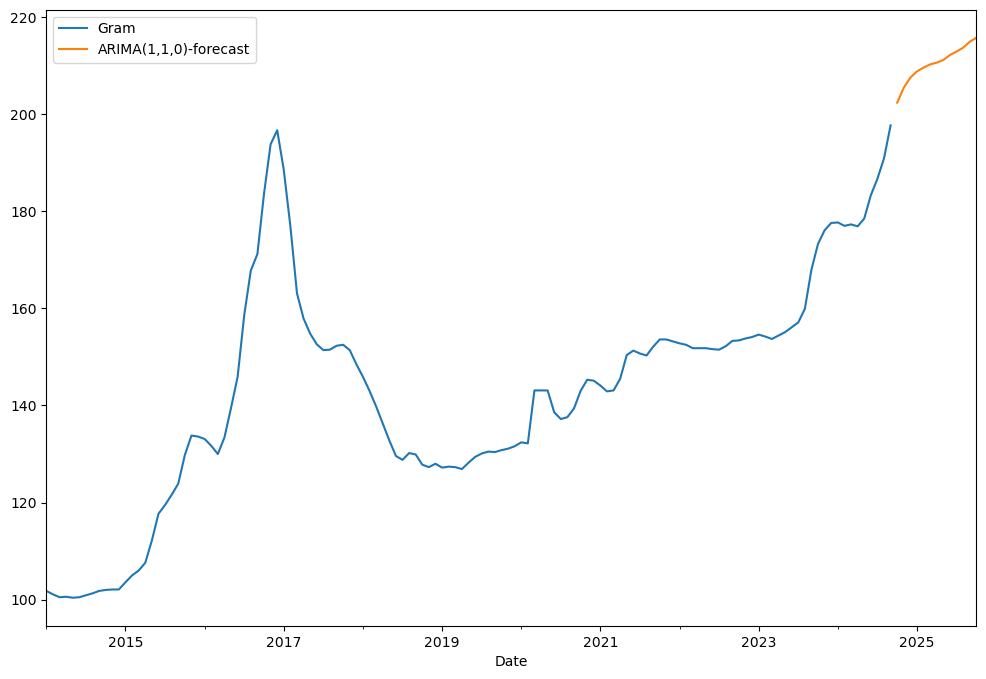

In [61]:
df['Gram'].plot(figsize=(12,8),legend=True)
forecast_gram.plot(legend=True)

In [62]:
print(forecast_gram)

2024-10-01    202.370041
2024-11-01    205.466927
2024-12-01    207.544068
2025-01-01    208.829209
2025-02-01    209.593024
2025-03-01    210.255838
2025-04-01    210.614247
2025-05-01    211.178637
2025-06-01    212.190126
2025-07-01    212.903834
2025-08-01    213.708305
2025-09-01    214.919082
2025-10-01    215.751167
Freq: MS, Name: ARIMA(1,1,0)-forecast, dtype: float64


# Kolmogorov-Smirnov test for goodness of fit. Normality of residuals

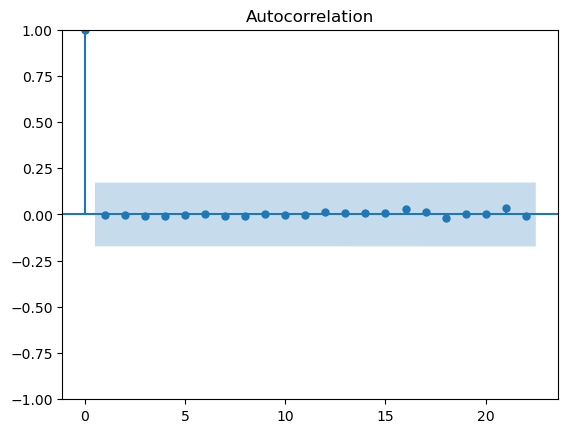

In [63]:
plot_acf(FinalResult_gram.resid);

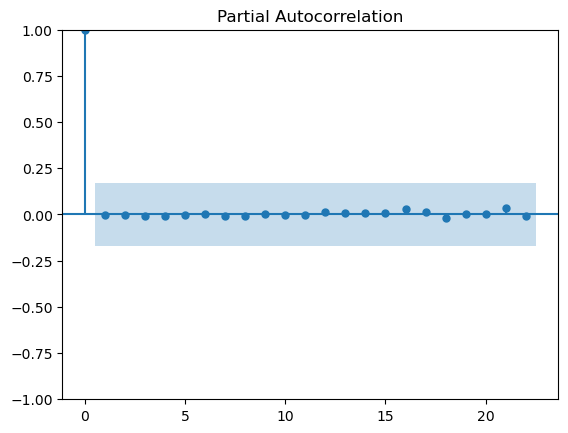

In [64]:
plot_pacf(FinalResult_gram.resid);

<Axes: xlabel='Date'>

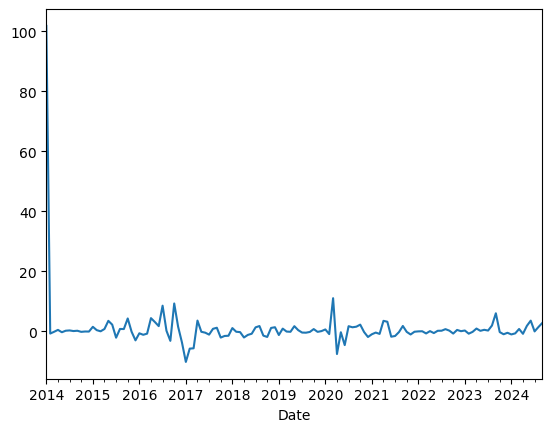

In [65]:
FinalResult_gram.resid.plot()

<Axes: ylabel='Frequency'>

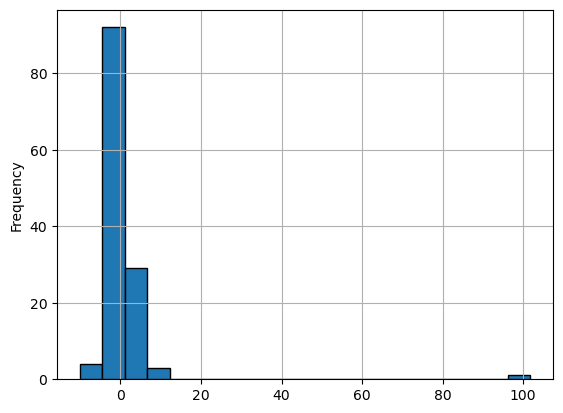

In [66]:
FinalResult_gram.resid.plot.hist(bins=20,grid=True,edgecolor='k')

##### Normality test

In [67]:
stats.kstest(FinalResult_gram.resid.values, 'norm') # Kolmogorov-Smirnov test

KstestResult(statistic=0.14696897458337066, pvalue=0.006768169810454694, statistic_location=1.368427408283651, statistic_sign=-1)

In [68]:
stats.shapiro(FinalResult_gram.resid)      # Shapiro wilk test

ShapiroResult(statistic=0.23014569282531738, pvalue=4.596054464022693e-23)

In [69]:
from statsmodels.graphics.tsaplots import quarter_plot, month_plot

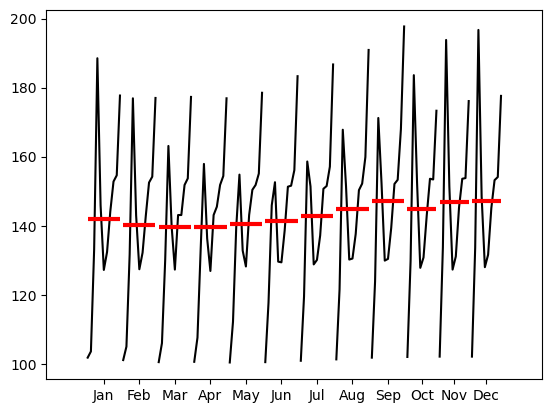

In [70]:
month_plot(df['Gram']);

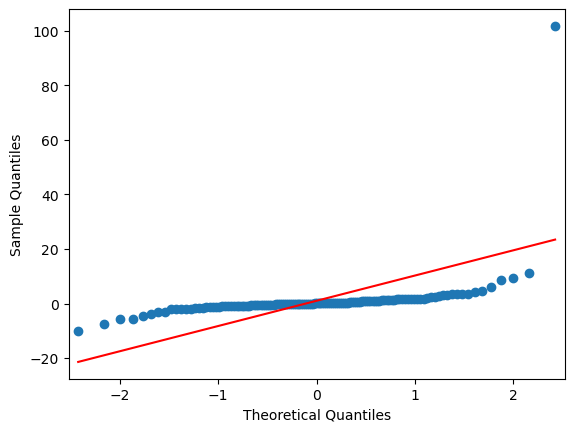

In [71]:
import numpy as np
import statsmodels.api as sm
import pylab


sm.qqplot(FinalResult_gram.resid, line='s');

In [72]:
sm.stats.diagnostic.acorr_ljungbox(FinalResult_gram.resid, lags=[30],return_df=True)

,lb_stat,lb_pvalue
30,2.073989,1.0


# ARIMA-GARCH

In [73]:
sm.stats.diagnostic.het_arch(FinalResult_gram.resid, nlags=10)

(28.017322538190456,
 0.0017937562870370734,
 3.325765869436733,
 0.0008459644436323714)

In [74]:
resid= FinalResult_gram.resid

In [75]:
resid

Date
2014-01-01    101.800000
2014-02-01     -0.700912
2014-03-01     -0.112476
2014-04-01      0.518520
2014-05-01     -0.267194
                 ...    
2024-05-01      1.842090
2024-06-01      3.601947
2024-07-01      0.013323
2024-08-01      1.483913
2024-09-01      2.848080
Freq: MS, Length: 129, dtype: float64

In [76]:
resid_train = resid.iloc[:115]
resid_test = resid.iloc[115:]

In [77]:
from arch import arch_model

In [78]:
model_garch = arch_model(resid_train , mean='constant', vol='GARCH', p=1, q=1)
results_garch = model_garch.fit(update_freq = 5)
results_garch.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 275.4370420609781
Iteration:     10,   Func. Count:     56,   Neg. LLF: 269.97384066472586
Optimization terminated successfully    (Exit mode 0)
            Current function value: 269.9737641291337
            Iterations: 16
            Function evaluations: 67
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -269.974
Distribution:                  Normal   AIC:                           547.948
Method:            Maximum Likelihood   BIC:                           558.927
                                        No. Observations:                  115
Date:                Mon, Nov 11 2024   Df Residuals:                      114
Time:                        02:14:27   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3360      0.257      1.306      0.192 [ -0.168,  0.840]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          2.6288      1.209      2.174  2.971e-02      [  0.259,  4.999]
alpha[1]       1.0000      0.432      2.315  2.060e-02      [  0.153,  1.847]
beta[1]    5.7191e-10  4.234e-04  1.351e-06      1.000 [-8.298e-04,8.298e-04]
=============================================================================

Covariance estimator: robust
"""

In [79]:
resid_test

Date
2023-08-01    1.975907
2023-09-01    6.051295
2023-10-01   -0.217002
2023-11-01   -0.938383
2023-12-01   -0.449377
2024-01-01   -0.991279
2024-02-01   -0.643981
2024-03-01    0.823704
2024-04-01   -0.784347
2024-05-01    1.842090
2024-06-01    3.601947
2024-07-01    0.013323
2024-08-01    1.483913
2024-09-01    2.848080
Freq: MS, dtype: float64

In [80]:
rolling_predictions = []
test_size = 14

for i in range(test_size):
    train = resid[:-(test_size-i)]
    model = arch_model(train, mean='constant', vol='GARCH', p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [81]:
rolling_predictions = pd.Series(rolling_predictions, index=resid.index[-14:])

In [82]:
rolling_predictions

Date
2023-08-01    1.621802
2023-09-01    2.295310
2023-10-01    5.951652
2023-11-01    1.989407
2023-12-01    2.083279
2024-01-01    1.816754
2024-02-01    2.093206
2024-03-01    1.790117
2024-04-01    1.550482
2024-05-01    1.831310
2024-06-01    2.071999
2024-07-01    3.513789
2024-08-01    1.644349
2024-09-01    1.989225
Freq: MS, dtype: float64

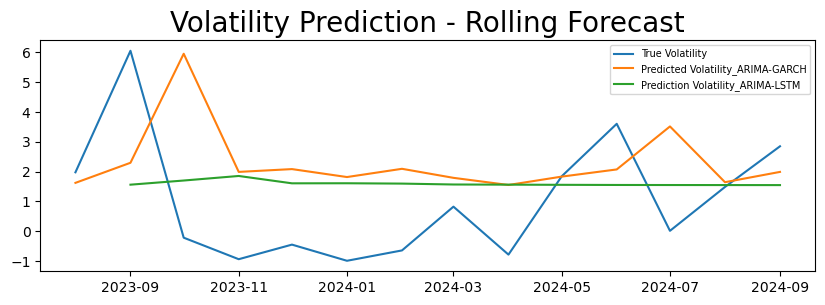

In [162]:
plt.figure(figsize=(10,3))
true, = plt.plot(resid_test)
preds, = plt.plot(rolling_predictions)
pred, = plt.plot(test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)'])
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility_ARIMA-GARCH','Prediction Volatility_ARIMA-LSTM'], fontsize=7)

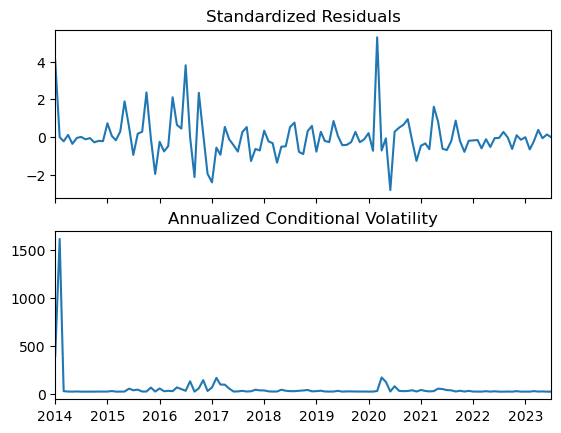

In [84]:
results_garch.plot(annualize='D');

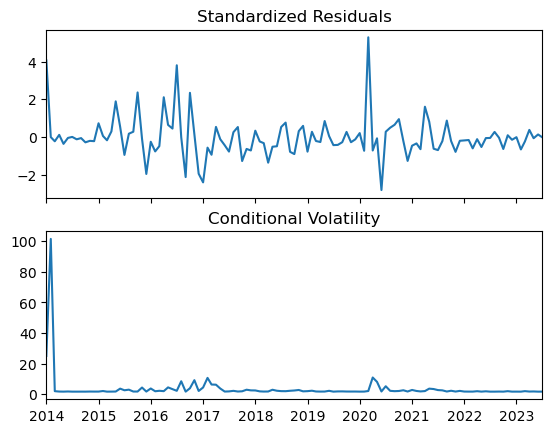

In [85]:
results_garch.plot();

## Normality Check

<Axes: ylabel='Frequency'>

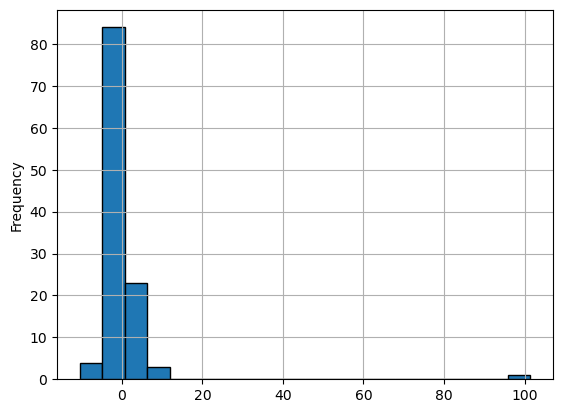

In [86]:
results_garch.resid.plot.hist(bins=20,grid=True,edgecolor='k')

In [87]:
stats.kstest(results_garch.std_resid.values, 'norm') # Kolmogorov-Smirnov test

KstestResult(statistic=0.1619983253818147, pvalue=0.004188149702688215, statistic_location=0.30708423177376243, statistic_sign=1)

In [88]:
stats.shapiro(results_garch.std_resid)      # Shapiro wilk test

ShapiroResult(statistic=0.8247224688529968, pvalue=2.2570040281166825e-10)

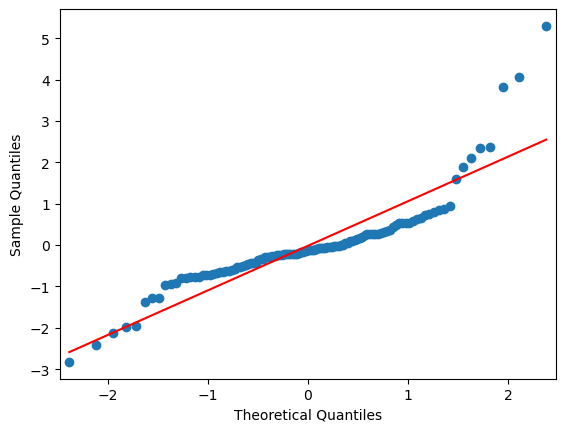

In [89]:
import numpy as np
import statsmodels.api as sm


sm.qqplot(results_garch.std_resid, line='s');

In [90]:
sm.stats.diagnostic.acorr_ljungbox(results_garch.resid, lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,0.073483,1.0


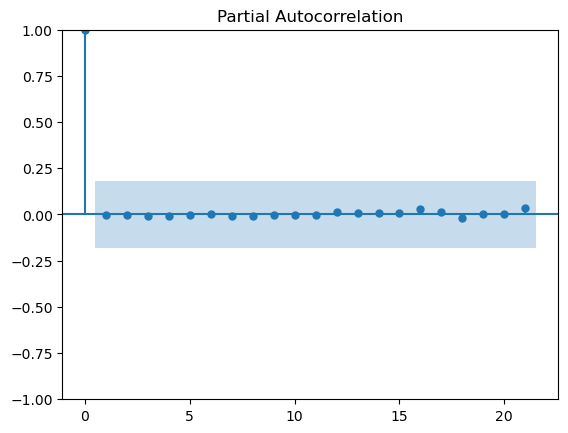

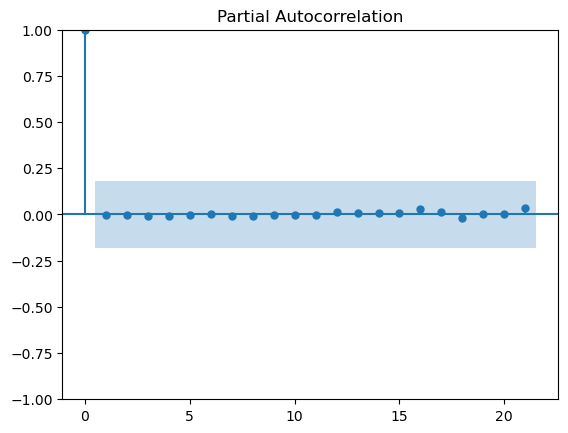

In [91]:
plot_pacf(results_garch.resid)

<Axes: xlabel='Date'>

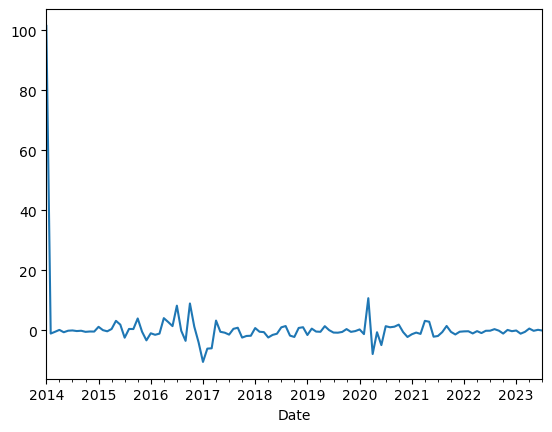

In [92]:
results_garch.resid.plot()

In [93]:
test

,Gram,Moong,Arhar,ARIMA_prediction
Date,,,,
2023-08-01,159.9,174.2,217.2,157.882439
2023-09-01,168.0,177.7,231.6,158.498131
2023-10-01,173.3,180.4,240.3,158.826510
2023-11-01,176.1,182.0,245.6,159.094452
2023-12-01,177.6,182.4,246.4,159.279873
2024-01-01,177.7,182.1,241.2,159.446161
2024-02-01,177.0,182.4,236.7,159.457392
2024-03-01,177.3,183.0,233.8,159.433544
2024-04-01,176.9,184.2,236.2,159.559929


In [94]:
prediction_gram

2023-08-01    157.882439
2023-09-01    158.498131
2023-10-01    158.826510
2023-11-01    159.094452
2023-12-01    159.279873
2024-01-01    159.446161
2024-02-01    159.457392
2024-03-01    159.433544
2024-04-01    159.559929
2024-05-01    159.676525
2024-06-01    159.827666
2024-07-01    159.974319
2024-08-01    160.088074
2024-09-01    160.176888
Freq: MS, Name: ARIMA(1,1,0)-predictions, dtype: float64

In [95]:
predicted_mu = result_gram.forecast()[0]

In [96]:
predicted_mu

157.88243932830872

In [97]:
garch_forecast = results_garch.forecast(horizon=1)

In [98]:
predicted_et = garch_forecast.mean['h.1'].iloc[-1]

In [99]:
predicted_et

0.3360078947494578

In [100]:
prediction = predicted_mu+predicted_et

In [101]:
prediction_GARCH = prediction_gram+rolling_predictions

In [102]:
prediction_GARCH

2023-08-01    159.504242
2023-09-01    160.793441
2023-10-01    164.778162
2023-11-01    161.083858
2023-12-01    161.363152
2024-01-01    161.262915
2024-02-01    161.550598
2024-03-01    161.223661
2024-04-01    161.110411
2024-05-01    161.507836
2024-06-01    161.899665
2024-07-01    163.488107
2024-08-01    161.732423
2024-09-01    162.166113
Freq: MS, dtype: float64

In [103]:
rmse(test['Gram'],prediction_GARCH)

18.95362536270207

In [104]:
prediction_GARCH.shape

(14,)

In [105]:
test['Gram'].shape

(14,)

In [106]:
prediction_gram.shape

(14,)

In [107]:
mse(test['Gram'],prediction_GARCH)

359.23991438966317

In [98]:
!pip install diebold_mariano_test

In [108]:
from diebold_mariano_test import cul_d_t,MAE,MSE,cul_DM,cul_P

In [109]:
dm = cul_d_t(MAE,test['Gram'],prediction_gram,prediction_GARCH)

In [110]:
cul_DM(dm)

7.750265862028622

In [111]:
cul_P(dm)

9.170035336784611e-15

In [112]:
MAE(3,test['Gram'],prediction_gram)

14.473490239804107

In [113]:
dm1=cul_d_t(MAE,test['Gram'],prediction_GARCH,prediction_gram)

In [114]:
cul_DM(dm1)

-7.750265862028622

In [115]:
test['GARCH_prediction']= prediction_GARCH

# ARIMA-LSTM

### Lag estimation

In [116]:
from statsmodels.tsa.stattools import acf
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from pandas import DataFrame

In [117]:
acf(FinalResult_gram.resid**2,nlags=12,qstat=True)

(array([ 1.00000000e+00, -5.41641992e-04, -7.18030285e-04, -6.40735736e-04,
        -8.71112238e-04, -9.35750758e-04, -9.43798474e-04, -1.09064991e-03,
        -1.16131771e-03, -1.21505541e-03, -1.31997947e-03, -1.39805742e-03,
        -1.21919798e-03]),
 array([3.87325142e-05, 1.07335467e-04, 1.62397007e-04, 2.64985635e-04,
        3.84318398e-04, 5.06699522e-04, 6.71467158e-04, 8.59822411e-04,
        1.06773076e-03, 1.31515851e-03, 1.59507534e-03, 1.80977117e-03]),
 array([0.99503436, 0.99994633, 0.99999945, 0.99999999, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]))

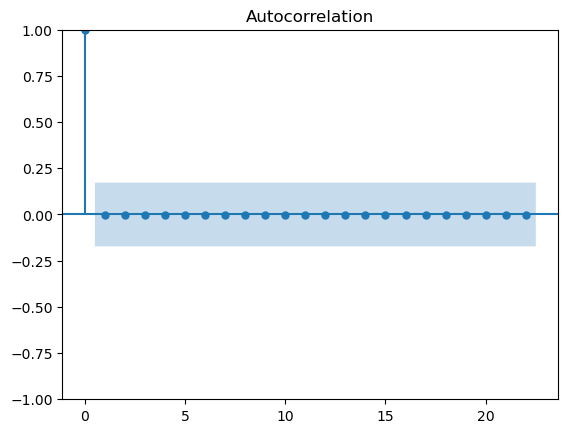

In [118]:
plot_acf(FinalResult_gram.resid**2);

In [119]:
df['resid'] = FinalResult_gram.resid**2

In [120]:
df

,Gram,Moong,Arhar,resid
Date,,,,
2014-01-01,101.8,113.6,106.7,10363.240000
2014-02-01,101.1,116.9,106.5,0.491277
2014-03-01,100.5,120.0,106.0,0.012651
2014-04-01,100.6,124.1,106.6,0.268863
2014-05-01,100.4,126.6,106.8,0.071393
...,...,...,...,...
2024-05-01,178.5,185.3,243.6,3.393296
2024-06-01,183.3,186.2,254.1,12.974024
2024-07-01,186.7,186.3,259.0,0.000178


In [121]:
mylist= ['resid']

df1 = df[mylist][1:]
df1.head()

,resid
Date,
2014-02-01,0.491277
2014-03-01,0.012651
2014-04-01,0.268863
2014-05-01,0.071393
2014-06-01,0.058695


In [122]:
dataframe = DataFrame()
for i in range(9,0,-1):
    dataframe['t-'+str(i)] = df1.shift(i).values[:,0]
dataframe['t'] = df1.values[:,0]
print(dataframe.head(10))
dataframe = dataframe[10:]

        t-9       t-8       t-7       t-6       t-5       t-4       t-3  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       NaN       NaN       NaN       NaN       NaN       NaN  0.491277   
4       NaN       NaN       NaN       NaN       NaN  0.491277  0.012651   
5       NaN       NaN       NaN       NaN  0.491277  0.012651  0.268863   
6       NaN       NaN       NaN  0.491277  0.012651  0.268863  0.071393   
7       NaN       NaN  0.491277  0.012651  0.268863  0.071393  0.058695   
8       NaN  0.491277  0.012651  0.268863  0.071393  0.058695  0.112404   
9  0.491277  0.012651  0.268863  0.071393  0.058695  0.112404  0.016624   

        t-2       t-1         t  
0       NaN       NaN  0.491277  
1       NaN  0.491277  0.012651  
2  0.491277  0.012651  0.268863  
3  0.012651  0.268863  0.071393  
4  0

In [123]:
dataframe.to_csv('lags_12months_features.csv', index=False)

In [124]:
dataframe = pd.read_csv('lags_12months_features.csv', header=0)
array = dataframe.values

In [125]:
X = array[:,0:-1]
y = array[:,-1]

In [126]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X, y)

RandomForestRegressor(random_state=1)

In [127]:
print(model.feature_importances_)

[0.03801971 0.06366129 0.02458203 0.1535586  0.04839102 0.07615036
 0.36812503 0.08867298 0.13883897]


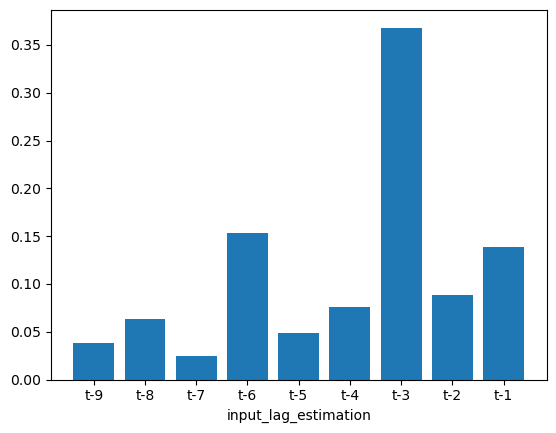

In [128]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.xlabel('input_lag_estimation')
pyplot.show()

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2014-02-01 to 2024-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   resid   128 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [130]:
train_resid = df1.iloc[:115]
test_resid = df1.iloc[115:]

In [131]:
train_resid

,resid
Date,
2014-02-01,0.491277
2014-03-01,0.012651
2014-04-01,0.268863
2014-05-01,0.071393
2014-06-01,0.058695
...,...
2023-04-01,0.932701
2023-05-01,0.045617
2023-06-01,0.299389


In [132]:
test_resid

,resid
Date,
2023-09-01,36.618171
2023-10-01,0.047090
2023-11-01,0.880563
2023-12-01,0.201940
2024-01-01,0.982635
2024-02-01,0.414712
2024-03-01,0.678488
2024-04-01,0.615200
2024-05-01,3.393296


In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()
scaler.fit(train_resid)

MinMaxScaler()

In [135]:
scaled_train = scaler.transform(train_resid)
scaled_test = scaler.transform(test_resid)

In [136]:
scaled_test

array([[ 2.98321469e-01],
       [ 3.80892263e-04],
       [ 7.17110722e-03],
       [ 1.64243804e-03],
       [ 8.00267205e-03],
       [ 3.37586846e-03],
       [ 5.52482411e-03],
       [ 5.00922571e-03],
       [ 2.76420622e-02],
       [ 1.05695208e-01],
       [-1.29715815e-06],
       [ 1.79366818e-02],
       [ 6.60812495e-02]])

In [261]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.


In [262]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [138]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [139]:
# Define the generator
n_input = 3 # how many data will estimate the next time stand value.
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [140]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import plot_model

In [141]:
model = Sequential()

model.add(LSTM(66, activation='relu', input_shape =(n_input,n_features)))    #relu = rectified linear unit
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [142]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 66)             │        17,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            67 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,019 (70.39 KB)

 Trainable params: 18,019 (70.39 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [144]:
model.fit(train_generator, epochs=25)

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0439
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0311  
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0276 
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0275
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0241
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0165 
Epoch 9/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0348
Epoch 10/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193
Epoch 11/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091
Epoch 12/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0192
Epoch 13/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0264
Epoch 14/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189
Epoch 15/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

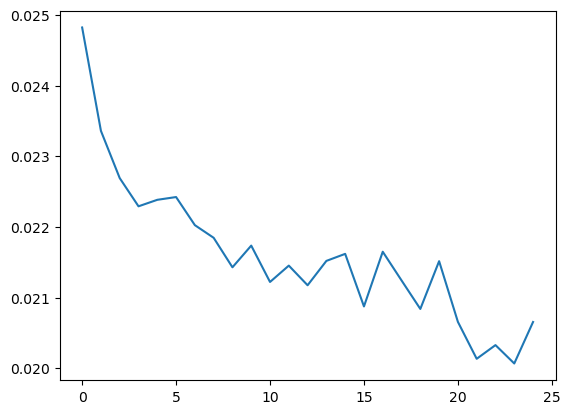

In [145]:
myloss = model.history.history['loss']

plt.plot(range(len(myloss)),myloss)

In [146]:
# Holding my prediction
test_prediction = []

# Last n_input point from the train set
first_eval_batch= scaled_train[-n_input:]

# Reshape this to the RNN format. same as TimeSeriesGenarator
current_batch = first_eval_batch.reshape((1,n_input,n_features))

# How far will we forecast?

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    current_batch= np.append(current_batch[:,1:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [147]:
test_prediction

[array([0.01271297], dtype=float32),
 array([0.01384828], dtype=float32),
 array([0.01509089], dtype=float32),
 array([0.01308449], dtype=float32),
 array([0.01310072], dtype=float32),
 array([0.01300756], dtype=float32),
 array([0.01276187], dtype=float32),
 array([0.01271999], dtype=float32),
 array([0.012674], dtype=float32),
 array([0.01263406], dtype=float32),
 array([0.01261833], dtype=float32),
 array([0.01260605], dtype=float32),
 array([0.01259784], dtype=float32),
 array([0.01259343], dtype=float32)]

In [148]:
true_prediction = scaler.inverse_transform(test_prediction)

In [149]:
true_prediction = true_prediction[:13]


In [150]:
test_resid['resid']

Date
2023-09-01    36.618171
2023-10-01     0.047090
2023-11-01     0.880563
2023-12-01     0.201940
2024-01-01     0.982635
2024-02-01     0.414712
2024-03-01     0.678488
2024-04-01     0.615200
2024-05-01     3.393296
2024-06-01    12.974024
2024-07-01     0.000178
2024-08-01     2.201997
2024-09-01     8.111561
Freq: MS, Name: resid, dtype: float64

In [151]:
test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)'] = true_prediction

In [152]:
test_resid['Prediction Volatility ARIMA-GARCH']= rolling_predictions
test_resid['true Volatility']= resid_test
test_resid.to_csv('Gram volatility.csv')

In [153]:
test['ARIMA-LSTM_Pred']= test['ARIMA_prediction']+test_resid['prediction Volatility ARIMA-LSTM(Random_Forest)']

In [154]:
test

,Gram,Moong,Arhar,ARIMA_prediction,GARCH_prediction,ARIMA-LSTM_Pred
Date,,,,,,
2023-08-01,159.9,174.2,217.2,157.882439,159.504242,NaN
2023-09-01,168.0,177.7,231.6,158.498131,160.793441,160.058938
2023-10-01,173.3,180.4,240.3,158.826510,164.778162,160.526670
2023-11-01,176.1,182.0,245.6,159.094452,161.083858,160.947138
2023-12-01,177.6,182.4,246.4,159.279873,161.363152,160.886281
2024-01-01,177.7,182.1,241.2,159.446161,161.262915,161.054562
2024-02-01,177.0,182.4,236.7,159.457392,161.550598,161.054357
2024-03-01,177.3,183.0,233.8,159.433544,161.223661,161.000352
2024-04-01,176.9,184.2,236.2,159.559929,161.110411,161.121597


In [155]:
test2=test = test.dropna(subset=['ARIMA-LSTM_Pred'])

test2


,Gram,Moong,Arhar,ARIMA_prediction,GARCH_prediction,ARIMA-LSTM_Pred
Date,,,,,,
2023-09-01,168.0,177.7,231.6,158.498131,160.793441,160.058938
2023-10-01,173.3,180.4,240.3,158.826510,164.778162,160.526670
2023-11-01,176.1,182.0,245.6,159.094452,161.083858,160.947138
2023-12-01,177.6,182.4,246.4,159.279873,161.363152,160.886281
2024-01-01,177.7,182.1,241.2,159.446161,161.262915,161.054562
2024-02-01,177.0,182.4,236.7,159.457392,161.550598,161.054357
2024-03-01,177.3,183.0,233.8,159.433544,161.223661,161.000352
2024-04-01,176.9,184.2,236.2,159.559929,161.110411,161.121597
2024-05-01,178.5,185.3,243.6,159.676525,161.507836,161.232548


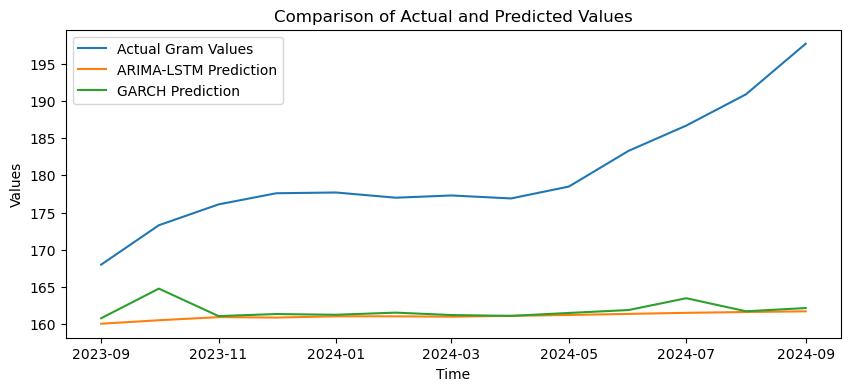

In [157]:
plt.figure(figsize=(10, 4))
plt.plot(test['Gram'], label='Actual Gram Values')
plt.plot(test['ARIMA-LSTM_Pred'], label='ARIMA-LSTM Prediction')
plt.plot(test['GARCH_prediction'], label='GARCH Prediction')

# Adding labels, title, and legend
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Comparison of Actual and Predicted Values")
plt.legend()
plt.show()

In [158]:
rmse(test['Gram'],test['ARIMA-LSTM_Pred'])

20.275804230973225

In [159]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [160]:
mean_absolute_percentage_error(test['Gram'],test['ARIMA-LSTM_Pred'])

10.403587282585

In [161]:
test.to_csv('Gram_result with ARIMA-LSTM Random forecst.csv')